<a href="https://colab.research.google.com/github/vitor1209/-conectados-/blob/main/registrador%20de%20d%C3%ADgitos/Detector_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
cd /content/gdrive/MyDrive/<conectados >/dataNum

/content/gdrive/MyDrive/<conectados >/dataNum


In [12]:
ls

sample_submission.csv  test.csv  train.csv


In [15]:
!cp ./train.csv /content

In [16]:
!cp ./test.csv /content

In [124]:
import pandas as pd

baseTrain = pd.read_csv('train.csv')
baseTest = pd.read_csv('test.csv')

In [125]:
X_train = baseTrain.drop('label' , axis=1)
print(X_train)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [126]:
y_train = baseTrain['label']
print(y_train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [127]:
import numpy as np

In [128]:
X_train = X_train / 255.0
baseTest = baseTest / 255.0

In [129]:
X_train = X_train.values.reshape(-1,28,28,1)
baseTest = baseTest.values.reshape(-1,28,28,1)

In [44]:
!pip install matplotlib

In [51]:
!pip install tensorflow keras

In [47]:
!pip install tensorflow

In [130]:
import numpy as np
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state= 2 )

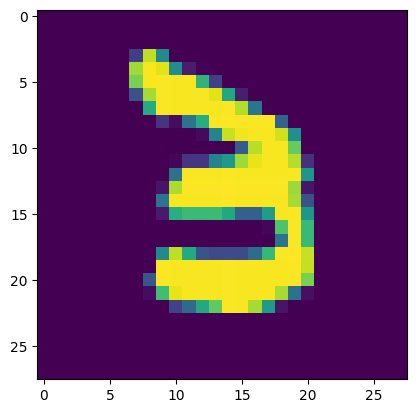

In [144]:
import matplotlib.pyplot as plt

img = plt.imshow(X_train[0][:,:,0])

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [146]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [147]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [148]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [149]:
epochs = 30
batch_size = 86

In [151]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [153]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

<ipython-input-153-4b41cf275442>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/30


395/395 - 21s - loss: 0.4926 - accuracy: 0.8397 - val_loss: 0.0739 - val_accuracy: 0.9757 - lr: 0.0010 - 21s/epoch - 53ms/step
Epoch 2/30


395/395 - 13s - loss: 0.1364 - accuracy: 0.9588 - val_loss: 0.0435 - val_accuracy: 0.9862 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 3/30


395/395 - 12s - loss: 0.1022 - accuracy: 0.9693 - val_loss: 0.0600 - val_accuracy: 0.9802 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 4/30


395/395 - 13s - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.0726 - val_accuracy: 0.9778 - lr: 0.0010 - 13s/epoch - 33ms/step
Epoch 5/30


395/395 - 15s - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.0348 - val_accuracy: 0.9886 - lr: 0.0010 - 15s/epoch - 37ms/step
Epoch 6/30


395/395 - 19s - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0495 - val_accuracy: 0.9852 - lr: 0.0010 - 19s/epoch - 47ms/step
Epoch 7/30


395/395 - 17s - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0425 - val_accuracy: 0.9889 - lr: 0.0010 - 17s/epoch - 44ms/step
Epoch 8/30


395/395 - 13s - loss: 0.0578 - accuracy: 0.9834 - val_loss: 0.0359 - val_accuracy: 0.9905 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 9/30


395/395 - 12s - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0317 - val_accuracy: 0.9926 - lr: 0.0010 - 12s/epoch - 32ms/step
Epoch 10/30


395/395 - 11s - loss: 0.0516 - accuracy: 0.9851 - val_loss: 0.0381 - val_accuracy: 0.9910 - lr: 0.0010 - 11s/epoch - 27ms/step
Epoch 11/30


395/395 - 12s - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.0325 - val_accuracy: 0.9905 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 12/30


395/395 - 12s - loss: 0.0505 - accuracy: 0.9858 - val_loss: 0.0327 - val_accuracy: 0.9910 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 13/30


395/395 - 12s - loss: 0.0507 - accuracy: 0.9858 - val_loss: 0.0288 - val_accuracy: 0.9918 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 14/30


395/395 - 13s - loss: 0.0496 - accuracy: 0.9860 - val_loss: 0.0517 - val_accuracy: 0.9870 - lr: 0.0010 - 13s/epoch - 33ms/step
Epoch 15/30


395/395 - 13s - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.0402 - val_accuracy: 0.9886 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 16/30


395/395 - 12s - loss: 0.0480 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9878 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 17/30


395/395 - 11s - loss: 0.0517 - accuracy: 0.9859 - val_loss: 0.0521 - val_accuracy: 0.9868 - lr: 0.0010 - 11s/epoch - 28ms/step
Epoch 18/30


395/395 - 13s - loss: 0.0496 - accuracy: 0.9865 - val_loss: 0.0503 - val_accuracy: 0.9892 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 19/30


395/395 - 12s - loss: 0.0510 - accuracy: 0.9864 - val_loss: 0.0378 - val_accuracy: 0.9894 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 20/30


395/395 - 12s - loss: 0.0513 - accuracy: 0.9860 - val_loss: 0.0419 - val_accuracy: 0.9889 - lr: 0.0010 - 12s/epoch - 30ms/step
Epoch 21/30


395/395 - 12s - loss: 0.0501 - accuracy: 0.9868 - val_loss: 0.0431 - val_accuracy: 0.9913 - lr: 0.0010 - 12s/epoch - 32ms/step
Epoch 22/30


395/395 - 13s - loss: 0.0512 - accuracy: 0.9865 - val_loss: 0.0439 - val_accuracy: 0.9899 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 23/30


395/395 - 12s - loss: 0.0503 - accuracy: 0.9869 - val_loss: 0.0368 - val_accuracy: 0.9902 - lr: 0.0010 - 12s/epoch - 30ms/step
Epoch 24/30


395/395 - 13s - loss: 0.0472 - accuracy: 0.9870 - val_loss: 0.0769 - val_accuracy: 0.9897 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 25/30


395/395 - 13s - loss: 0.0536 - accuracy: 0.9861 - val_loss: 0.0316 - val_accuracy: 0.9926 - lr: 0.0010 - 13s/epoch - 33ms/step
Epoch 26/30


395/395 - 12s - loss: 0.0501 - accuracy: 0.9868 - val_loss: 0.0361 - val_accuracy: 0.9910 - lr: 0.0010 - 12s/epoch - 31ms/step
Epoch 27/30


395/395 - 13s - loss: 0.0539 - accuracy: 0.9864 - val_loss: 0.0370 - val_accuracy: 0.9913 - lr: 0.0010 - 13s/epoch - 32ms/step
Epoch 28/30


395/395 - 13s - loss: 0.0548 - accuracy: 0.9854 - val_loss: 0.0298 - val_accuracy: 0.9918 - lr: 0.0010 - 13s/epoch - 33ms/step
Epoch 29/30


395/395 - 13s - loss: 0.0580 - accuracy: 0.9852 - val_loss: 0.0507 - val_accuracy: 0.9918 - lr: 0.0010 - 13s/epoch - 33ms/step
Epoch 30/30


395/395 - 13s - loss: 0.0563 - accuracy: 0.9859 - val_loss: 0.0387 - val_accuracy: 0.9926 - lr: 0.0010 - 13s/epoch - 32ms/step


119/119 [==============================] - 0s 3ms/step


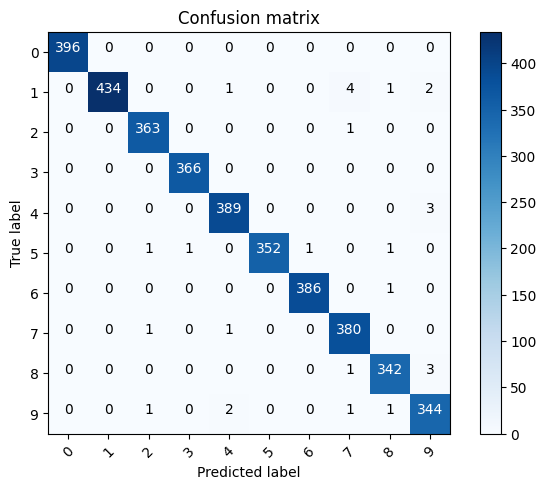

In [154]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1)

Y_true = np.argmax(Y_val,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(10))